# Practical Project Regression

## Importing the relevant libraries

In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from geopy.distance import geodesic
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

## Loading the raw data

In [2]:
# Load the data from a .xlsx in the same folder
raw_data = pd.read_excel("C:\\Users\\user\\Downloads\\Apartments_Data.xlsx")

# Let's explore the top 5 rows of the df
raw_data.head()
#raw_data.sample()

,gross_area,year,floor,bathrooms,bedrooms,furnished,balcony,mortgage,status,address,...,air_conditioner,chimney,natural_light,termoizolation,capot_system,acoustic,façade,solar_panel,Area,price
0,110.0,1998.0,1,1,2,1,1,1,pallat I vjeter,"Sheshi Willson - Rruga ""Zef Jubani"" - Tirana e...",...,0,0,0,0,0,0,0,0,Urbane,170000.0$
1,160.0,2000.0,1,2,3,0,0,0,pallat I vjeter,"Myslym Shyri - Myslym Shyri - Myslym Shyri, Sh...",...,0,0,0,0,0,0,0,0,Urbane,224000.0$
2,126.5,2021.0,2,1,2,1,1,1,pallat I ri,"Liqeni i Thate - Liqeni i Thatë, Shqipëri",...,1,0,1,0,0,0,0,0,Urbane,195000.0$
3,130.5,2021.0,2,2,2,0,1,1,I PaPerfunduar,"Rruga e Dafinave - Fusha e Aviacionit, Shqipëri",...,0,0,0,0,0,0,1,0,Urbane,156000.0$
4,131.7,2021.0,2,2,2,0,1,1,I PaPerfunduar,"Rruga e Dafinave - Fusha e Aviacionit, Shqipëri",...,0,0,0,0,0,0,1,0,Urbane,159000.0$


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument

display(raw_data.describe(include='all'))
display(raw_data.describe())

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,gross_area,year,floor,bathrooms,bedrooms,furnished,balcony,mortgage,status,address,...,air_conditioner,chimney,natural_light,termoizolation,capot_system,acoustic,façade,solar_panel,Area,price
count,3840.000000,3837.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840,3840,...,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840,3840
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,942
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pallat I ri,"astir tirane,Tirana,Albania",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Urbane,75000.0$
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3091,67
mean,103.788424,2001.938233,4.296615,1.440104,1.891146,0.263802,0.692187,0.554167,NaN,NaN,...,0.073438,0.025781,0.198958,0.091667,0.049479,0.100260,0.072656,0.006771,NaN,NaN
std,39.504726,37.108121,2.508187,0.529471,0.713524,0.440751,0.461649,0.497122,NaN,NaN,...,0.260887,0.158503,0.399269,0.288592,0.216895,0.300386,0.259605,0.082017,NaN,NaN
min,35.600000,697.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,75.000000,1985.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,100.000000,2007.000000,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,120.000000,2018.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


,gross_area,year,floor,bathrooms,bedrooms,furnished,balcony,mortgage,lat,lon,...,parquet,surveillance_system,air_conditioner,chimney,natural_light,termoizolation,capot_system,acoustic,façade,solar_panel
count,3840.000000,3837.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,...,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000
mean,103.788424,2001.938233,4.296615,1.440104,1.891146,0.263802,0.692187,0.554167,41.327820,19.811854,...,0.104948,0.034896,0.073438,0.025781,0.198958,0.091667,0.049479,0.100260,0.072656,0.006771
std,39.504726,37.108121,2.508187,0.529471,0.713524,0.440751,0.461649,0.497122,0.014814,0.026519,...,0.306526,0.183540,0.260887,0.158503,0.399269,0.288592,0.216895,0.300386,0.259605,0.082017
min,35.600000,697.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.223616,19.472016,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,1985.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.321156,19.794840,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,2007.000000,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,41.329917,19.810961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,120.000000,2018.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,41.336561,19.828552,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,422.000000,2025.000000,20.000000,4.000000,6.000000,1.000000,1.000000,1.000000,41.383976,19.905172,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Determining the variables of interest

In [4]:
# Let's use the longtidude and latidude columns to find the distance from center which is a good reason to affect the price.
raw_data['latitude_center'] = 41.327953
raw_data['longitude_center'] = 19.819025
raw_data['distance_from_center'] = raw_data.apply(lambda x: geodesic((x['lat'], x['lon']),(x['latitude_center'], x['longitude_center'])).km,axis = 1)
raw_data

,gross_area,year,floor,bathrooms,bedrooms,furnished,balcony,mortgage,status,address,...,termoizolation,capot_system,acoustic,façade,solar_panel,Area,price,latitude_center,longitude_center,distance_from_center
0,110.0,1998.0,1,1,2,1,1,1,pallat I vjeter,"Sheshi Willson - Rruga ""Zef Jubani"" - Tirana e...",...,0,0,0,0,0,Urbane,170000.0$,41.327953,19.819025,1.117104
1,160.0,2000.0,1,2,3,0,0,0,pallat I vjeter,"Myslym Shyri - Myslym Shyri - Myslym Shyri, Sh...",...,0,0,0,0,0,Urbane,224000.0$,41.327953,19.819025,0.630246
2,126.5,2021.0,2,1,2,1,1,1,pallat I ri,"Liqeni i Thate - Liqeni i Thatë, Shqipëri",...,0,0,0,0,0,Urbane,195000.0$,41.327953,19.819025,2.769368
3,130.5,2021.0,2,2,2,0,1,1,I PaPerfunduar,"Rruga e Dafinave - Fusha e Aviacionit, Shqipëri",...,0,0,0,1,0,Urbane,156000.0$,41.327953,19.819025,2.760413
4,131.7,2021.0,2,2,2,0,1,1,I PaPerfunduar,"Rruga e Dafinave - Fusha e Aviacionit, Shqipëri",...,0,0,0,1,0,Urbane,159000.0$,41.327953,19.819025,2.760413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,93.0,1977.0,5,1,2,0,1,0,pallat I vjeter,"Sheshi Willson, Tirana",...,0,0,0,0,0,Qendrore,135000.0$,41.327953,19.819025,1.117104
3836,139.0,2007.0,3,2,2,1,1,1,pallat I ri,"Air Albania Stadium, Sheshi Italia, Tirana",...,0,0,0,0,0,Qendrore,238000.0$,41.327953,19.819025,1.124268
3837,135.0,1977.0,4,2,3,1,1,1,pallat I vjeter,EJA Studio Tirana,...,0,0,0,0,0,Suburbane,120000.0$,41.327953,19.819025,3.211295
3838,76.0,2006.0,7,1,1,0,1,0,pallat I ri,"Dogana, Tirana",...,0,0,1,1,0,Urbane,68400.0$,41.327953,19.819025,3.015192


In [5]:
# We can use the comment context in the dataset to add new columns such as elevator and parking
# If the word elevator or parking is mentioned in the comment, it means that the apartments provides these two aspects
def hasParking(comment):
    comment_lower = str(comment).lower()
    if 'parkim' in comment_lower:
        return 1
    else:
        return 0
    
raw_data['Parkim'] = raw_data['comments'].apply(hasParking)

# Display the DataFrame with the new column named Parkim(meaning parking)
print(raw_data)

      gross_area    year  floor  bathrooms  bedrooms  furnished  balcony  \
0          110.0  1998.0      1          1         2          1        1   
1          160.0  2000.0      1          2         3          0        0   
2          126.5  2021.0      2          1         2          1        1   
3          130.5  2021.0      2          2         2          0        1   
4          131.7  2021.0      2          2         2          0        1   
...          ...     ...    ...        ...       ...        ...      ...   
3835        93.0  1977.0      5          1         2          0        1   
3836       139.0  2007.0      3          2         2          1        1   
3837       135.0  1977.0      4          2         3          1        1   
3838        76.0  2006.0      7          1         1          0        1   
3839       124.0  2007.0      4          1         2          0        0   

      mortgage           status  \
0            1  pallat I vjeter   
1            0  p

In [6]:
def hasElevator(comment):
    comment_lower = str(comment).lower()
    if 'ashensor' in comment_lower:
        return 1
    else:
        return 0
    
raw_data['Ashensor'] = raw_data['comments'].apply(hasElevator)

# Display the DataFrame with the new column
print(raw_data)

      gross_area    year  floor  bathrooms  bedrooms  furnished  balcony  \
0          110.0  1998.0      1          1         2          1        1   
1          160.0  2000.0      1          2         3          0        0   
2          126.5  2021.0      2          1         2          1        1   
3          130.5  2021.0      2          2         2          0        1   
4          131.7  2021.0      2          2         2          0        1   
...          ...     ...    ...        ...       ...        ...      ...   
3835        93.0  1977.0      5          1         2          0        1   
3836       139.0  2007.0      3          2         2          1        1   
3837       135.0  1977.0      4          2         3          1        1   
3838        76.0  2006.0      7          1         1          0        1   
3839       124.0  2007.0      4          1         2          0        0   

      mortgage           status  \
0            1  pallat I vjeter   
1            0  p

In [7]:
# There are some characters in the price column such as '$' , we need to remove these chars for future use.
# Price column should contain only numbers.
raw_data['price'] = raw_data['price'].replace('[^\d.]', '', regex=True)

# Convert the column to float
raw_data['price'] = raw_data['price'].astype(float)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(raw_data)


Cleaned DataFrame:
      gross_area    year  floor  bathrooms  bedrooms  furnished  balcony  \
0          110.0  1998.0      1          1         2          1        1   
1          160.0  2000.0      1          2         3          0        0   
2          126.5  2021.0      2          1         2          1        1   
3          130.5  2021.0      2          2         2          0        1   
4          131.7  2021.0      2          2         2          0        1   
...          ...     ...    ...        ...       ...        ...      ...   
3835        93.0  1977.0      5          1         2          0        1   
3836       139.0  2007.0      3          2         2          1        1   
3837       135.0  1977.0      4          2         3          1        1   
3838        76.0  2006.0      7          1         1          0        1   
3839       124.0  2007.0      4          1         2          0        0   

      mortgage           status  \
0            1  pallat I vjeter 

In [8]:
data = raw_data.drop(['Area','acoustic','comments','lat','lon','storehouse','parquet','surveillance_system','termoizolation','natural_light','capot_system','façade','chimney',
'address','orientation'],axis=1)
# Let's check the descriptives without the columns that do not affect the price of the apartment
data.describe(include='all')

,gross_area,year,floor,bathrooms,bedrooms,furnished,balcony,mortgage,status,air_conditioner,solar_panel,price,latitude_center,longitude_center,distance_from_center,Parkim,Ashensor
count,3840.000000,3837.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840,3840.000000,3840.000000,3840.000000,3.840000e+03,3.840000e+03,3840.000000,3840.000000,3840.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pallat I ri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.788424,2001.938233,4.296615,1.440104,1.891146,0.263802,0.692187,0.554167,NaN,0.073438,0.006771,121405.257005,4.132795e+01,1.981903e+01,2.316595,0.157292,0.360156
std,39.504726,37.108121,2.508187,0.529471,0.713524,0.440751,0.461649,0.497122,NaN,0.260887,0.082017,75732.312025,1.421271e-14,4.583598e-13,1.621385,0.364123,0.480108
min,35.600000,697.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,27000.000000,4.132795e+01,1.981902e+01,0.029958,0.000000,0.000000
25%,75.000000,1985.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,72178.000000,4.132795e+01,1.981902e+01,1.330719,0.000000,0.000000
50%,100.000000,2007.000000,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,99960.000000,4.132795e+01,1.981902e+01,2.204174,0.000000,0.000000
75%,120.000000,2018.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,145000.000000,4.132795e+01,1.981902e+01,3.058719,0.000000,1.000000


### Dealing with missing values

In [9]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

gross_area              0
year                    3
floor                   0
bathrooms               0
bedrooms                0
furnished               0
balcony                 0
mortgage                0
status                  0
air_conditioner         0
solar_panel             0
price                   0
latitude_center         0
longitude_center        0
distance_from_center    0
Parkim                  0
Ashensor                0
dtype: int64

In [10]:
# Let's simply drop all 3 missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_mv = data.dropna(axis=0)

In [11]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,gross_area,year,floor,bathrooms,bedrooms,furnished,balcony,mortgage,status,air_conditioner,solar_panel,price,latitude_center,longitude_center,distance_from_center,Parkim,Ashensor
count,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837,3837.000000,3837.000000,3837.000000,3.837000e+03,3.837000e+03,3837.000000,3837.000000,3837.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pallat I ri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.811454,2001.938233,4.298150,1.440448,1.891843,0.263748,0.692468,0.554339,NaN,0.073495,0.006776,121431.635887,4.132795e+01,1.981903e+01,2.316438,0.157415,0.360438
std,39.511313,37.108121,2.508324,0.529535,0.713368,0.440722,0.461532,0.497103,NaN,0.260981,0.082049,75750.735942,1.421271e-14,4.619130e-13,1.621772,0.364239,0.480190
min,35.600000,697.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,27000.000000,4.132795e+01,1.981902e+01,0.029958,0.000000,0.000000
25%,75.000000,1985.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,72336.000000,4.132795e+01,1.981902e+01,1.330719,0.000000,0.000000
50%,100.000000,2007.000000,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,100000.000000,4.132795e+01,1.981902e+01,2.203528,0.000000,0.000000
75%,120.000000,2018.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,145000.000000,4.132795e+01,1.981902e+01,3.058719,0.000000,1.000000


### Exploring the PDFs

C:\Users\user\AppData\Local\Temp\ipykernel_13036\2499750768.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['price'])


<Axes: xlabel='price', ylabel='Density'>

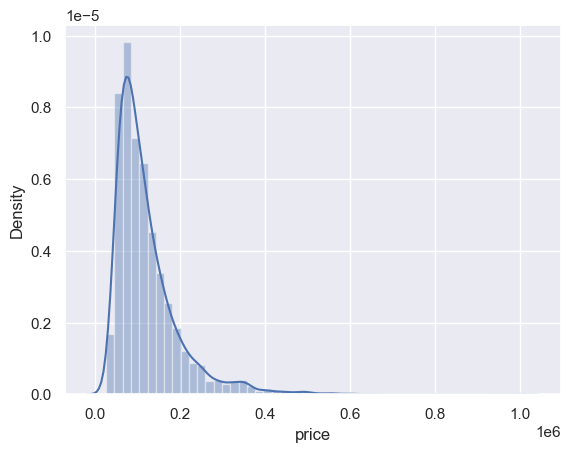

In [12]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_mv['price'])

In [13]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied

# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['price'].quantile(0.98)
# Then we can create a new df, with the condition that all prices must be below the 98 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['price']<q]
# In this way we have essentially removed the top 2% of the data about 'Price'
data_1.describe(include='all')

,gross_area,year,floor,bathrooms,bedrooms,furnished,balcony,mortgage,status,air_conditioner,solar_panel,price,latitude_center,longitude_center,distance_from_center,Parkim,Ashensor
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751,3751.000000,3751.000000,3751.000000,3.751000e+03,3.751000e+03,3751.000000,3751.000000,3751.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pallat I ri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,101.782527,2001.916022,4.257265,1.423887,1.869368,0.259664,0.690483,0.551053,NaN,0.072514,0.006665,114500.533698,4.132795e+01,1.981902e+01,2.330635,0.152226,0.362037
std,36.418275,37.461904,2.466995,0.518464,0.699712,0.438509,0.462356,0.497453,NaN,0.259372,0.081377,59367.404851,1.421275e-14,5.720632e-13,1.605638,0.359288,0.480653
min,35.600000,697.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,27000.000000,4.132795e+01,1.981902e+01,0.029958,0.000000,0.000000
25%,74.000000,1985.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,72000.000000,4.132795e+01,1.981902e+01,1.330719,0.000000,0.000000
50%,99.000000,2007.000000,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,98000.000000,4.132795e+01,1.981902e+01,2.254047,0.000000,0.000000
75%,118.000000,2018.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,140820.000000,4.132795e+01,1.981902e+01,3.058719,0.000000,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_13036\2192467106.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['price'])


<Axes: xlabel='price', ylabel='Density'>

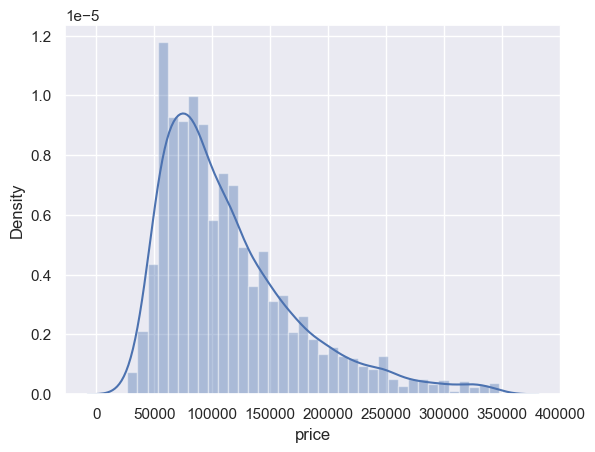

In [14]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1['price'])

C:\Users\user\AppData\Local\Temp\ipykernel_13036\1469349068.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['gross_area'])


<Axes: xlabel='gross_area', ylabel='Density'>

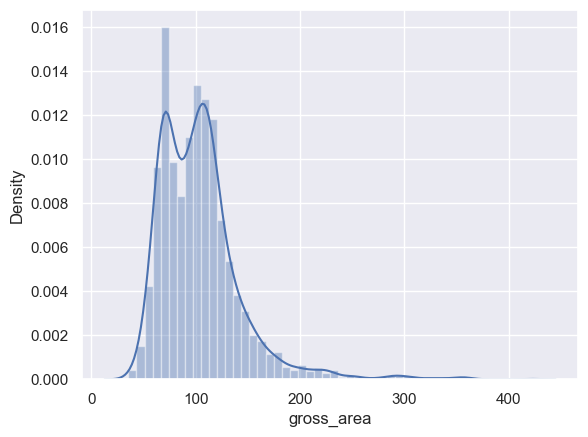

In [15]:
# We can treat the other numerical variables in a similar way
sns.distplot(data_no_mv['gross_area'])

In [16]:
q = data_1['gross_area'].quantile(0.99)
data_2 = data_1[data_1['gross_area']<q]

C:\Users\user\AppData\Local\Temp\ipykernel_13036\2790883941.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['gross_area'])


<Axes: xlabel='gross_area', ylabel='Density'>

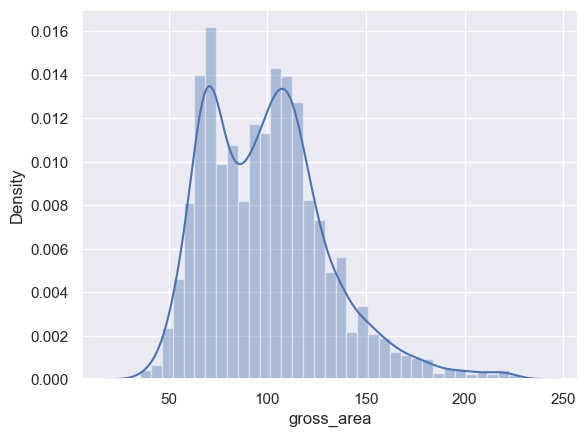

In [17]:
# This plot looks kind of normal, doesn't it?
sns.distplot(data_2['gross_area'])

C:\Users\user\AppData\Local\Temp\ipykernel_13036\579716405.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['year'])


<Axes: xlabel='year', ylabel='Density'>

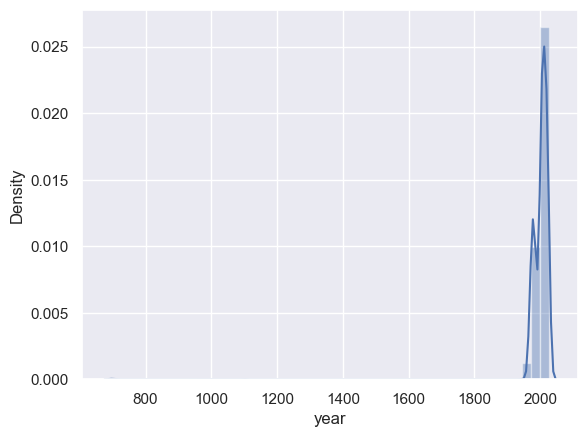

In [18]:
# There are also some incorrect entries here
sns.distplot(data_no_mv['year'])

In [19]:
data_3 = data_2[(data_2['year'] > 2001) & (data_2['year'] < 2023)]

C:\Users\user\AppData\Local\Temp\ipykernel_13036\1299253266.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['year'])


<Axes: xlabel='year', ylabel='Density'>

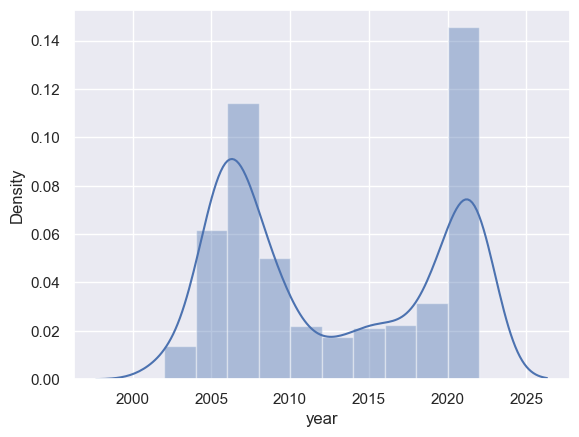

In [20]:
sns.distplot(data_3['year'])

C:\Users\user\AppData\Local\Temp\ipykernel_13036\3040451229.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['floor'])


<Axes: xlabel='floor', ylabel='Density'>

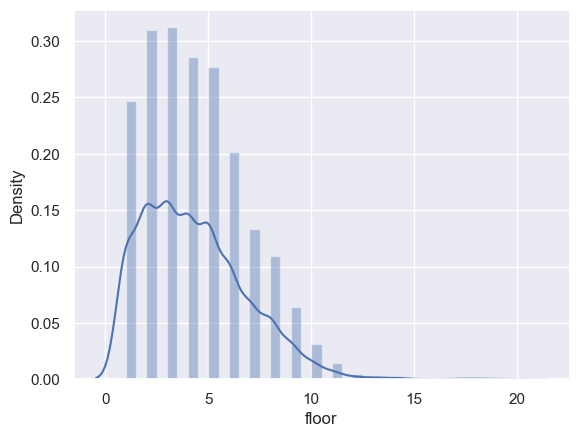

In [21]:
sns.distplot(data_no_mv['floor'])

In [22]:
#Tirana does not have big buildings in general so i removed some of the upper floors which were too high for the city
q = data_3['floor'].quantile(0.9) 
data_4 = data_3[data_3['floor']<q]

C:\Users\user\AppData\Local\Temp\ipykernel_13036\1965192028.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['floor'])


<Axes: xlabel='floor', ylabel='Density'>

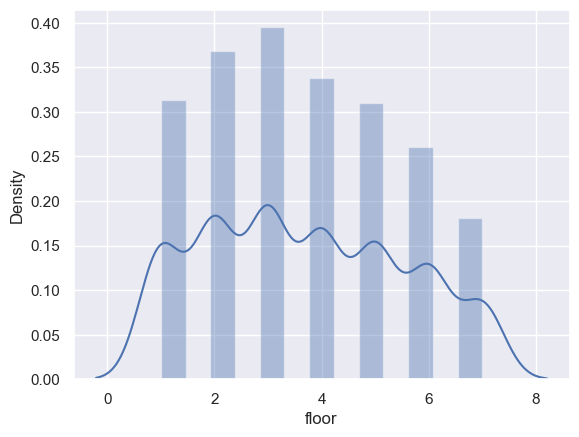

In [23]:
sns.distplot(data_4['floor'])

In [24]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [25]:
# Let's see what's left
data_cleaned.describe(include='all')

,gross_area,year,floor,bathrooms,bedrooms,furnished,balcony,mortgage,status,air_conditioner,solar_panel,price,latitude_center,longitude_center,distance_from_center,Parkim,Ashensor
count,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074.000000,2074,2074.000000,2074.000000,2074.000000,2.074000e+03,2.074000e+03,2074.000000,2074.000000,2074.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pallat I ri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,101.352372,2012.583414,3.676953,1.445034,1.819190,0.238187,0.721794,0.442141,NaN,0.080521,0.005786,114699.650627,4.132795e+01,1.981902e+01,2.505889,0.178399,0.409836
std,30.899910,6.771228,1.853740,0.519858,0.672381,0.426077,0.448224,0.496761,NaN,0.272163,0.075863,57589.026709,1.421428e-14,2.167678e-13,1.595827,0.382941,0.491922
min,35.600000,2002.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,27000.000000,4.132795e+01,1.981902e+01,0.029958,0.000000,0.000000
25%,75.000000,2006.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,73000.000000,4.132795e+01,1.981902e+01,1.621966,0.000000,0.000000
50%,100.000000,2010.000000,4.000000,1.000000,2.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,100000.000000,4.132795e+01,1.981902e+01,2.390154,0.000000,0.000000
75%,118.000000,2020.000000,5.000000,2.000000,2.000000,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,142000.000000,4.132795e+01,1.981902e+01,3.058719,0.000000,1.000000


### Discovering relationships through vizualizations

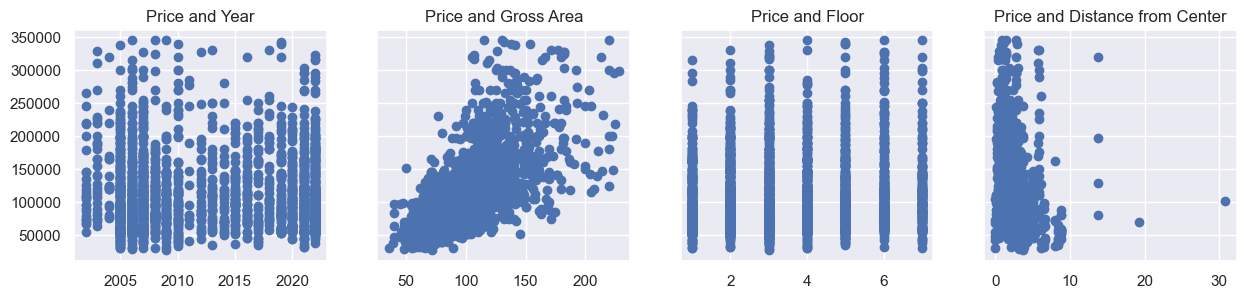

In [26]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y

ax1.scatter(data_cleaned['year'],data_cleaned['price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['gross_area'],data_cleaned['price'])
ax2.set_title('Price and Gross Area')

ax3.scatter(data_cleaned['floor'],data_cleaned['price'])
ax3.set_title('Price and Floor')

ax4.scatter(data_cleaned['distance_from_center'],data_cleaned['price'])
ax4.set_title('Price and Distance from Center')

plt.show()

In [27]:
# Let's quickly see the columns of our data frame
data_cleaned.dtypes

gross_area              float64
year                    float64
floor                     int64
bathrooms                 int64
bedrooms                  int64
furnished                 int64
balcony                   int64
mortgage                  int64
status                   object
air_conditioner           int64
solar_panel               int64
price                   float64
latitude_center         float64
longitude_center        float64
distance_from_center    float64
Parkim                    int64
Ashensor                  int64
dtype: object

In [28]:
#data_cleaned.dtypes

object_dtypes = data_cleaned.select_dtypes(include=['object'])

for col in object_dtypes.columns:
    print(col)
    print(object_dtypes[col].unique())

status
['pallat I ri' 'I PaPerfunduar' 'i rikonstruktuar']


## Create dummy variables

In [29]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly

data_with_dummies = pd.get_dummies(data_cleaned)
data_with_dummies

,gross_area,year,floor,bathrooms,bedrooms,furnished,balcony,mortgage,air_conditioner,solar_panel,price,latitude_center,longitude_center,distance_from_center,Parkim,Ashensor,status_I PaPerfunduar,status_i rikonstruktuar,status_pallat I ri
0,126.5,2021.0,2,1,2,1,1,1,1,0,195000.0,41.327953,19.819025,2.769368,1,1,False,False,True
1,130.5,2021.0,2,2,2,0,1,1,0,0,156000.0,41.327953,19.819025,2.760413,1,1,True,False,False
2,131.7,2021.0,2,2,2,0,1,1,0,0,159000.0,41.327953,19.819025,2.760413,1,1,True,False,False
3,124.6,2022.0,2,2,2,0,1,0,0,0,203000.0,41.327953,19.819025,1.330719,1,1,False,False,True
4,146.0,2021.0,4,2,3,0,1,0,0,0,165000.0,41.327953,19.819025,2.747406,0,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,110.0,2022.0,7,1,2,1,1,1,1,0,190000.0,41.327953,19.819025,2.769368,1,0,False,False,True
2070,150.0,2008.0,1,2,2,1,0,1,0,0,160000.0,41.327953,19.819025,2.769368,1,1,False,False,True
2071,139.0,2007.0,3,2,2,1,1,1,0,0,238000.0,41.327953,19.819025,1.124268,0,0,False,False,True
2072,76.0,2006.0,7,1,1,0,1,0,0,0,68400.0,41.327953,19.819025,3.015192,0,0,False,False,True


## Regression model

### Declare the inputs and the targets

In [30]:
# The target(s) (dependent variable) is 'log price'
targets = data_with_dummies['price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_with_dummies.drop(['price'],axis=1)

### Scale the data

In [31]:
# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [32]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [33]:
# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [34]:
print(f"x train is: {x_train}")
print(f"x test is: {x_test}")

print(f"Y train is: {y_train}")

print(f"y_test is : {y_test}")

x train is: [[-1.22594226  1.39101171 -0.3652702  ...  1.80036352 -0.15060692
  -1.69606471]
 [-0.01140642 -0.97249738  0.7138899  ... -0.55544338 -0.15060692
   0.58960014]
 [ 2.22214831  0.94785376  1.25346995 ...  1.80036352 -0.15060692
  -1.69606471]
 ...
 [-0.33511     1.39101171 -0.3652702  ... -0.55544338 -0.15060692
   0.58960014]
 [ 0.50651932 -0.82477807 -0.3652702  ... -0.55544338 -0.15060692
   0.58960014]
 [-1.07962824 -1.1202167  -0.90485025 ... -0.55544338 -0.15060692
   0.58960014]]
x test is: [[-0.33511     1.09557307 -0.3652702  ...  1.80036352 -0.15060692
  -1.69606471]
 [ 0.73311183 -0.82477807 -1.4444303  ... -0.55544338 -0.15060692
   0.58960014]
 [-1.20910968  0.06153785 -0.90485025 ... -0.55544338 -0.15060692
   0.58960014]
 ...
 [-0.88540609 -0.67705875 -0.90485025 ... -0.55544338 -0.15060692
   0.58960014]
 [-1.20910968 -0.97249738 -0.90485025 ... -0.55544338 -0.15060692
   0.58960014]
 [ 0.66837111 -0.82477807 -1.4444303  ... -0.55544338 -0.15060692
   0.5896

### Create the regression

In [35]:
# Create a decision tree regression object since from the graph, we saw that linear regression is not a good fit in this case
model=DecisionTreeRegressor()
# Fit the regression with the scaled TRAIN inputs and targets
model.fit(x_train,y_train)

# Calulating R2 and checking
train_score=model.score(x_train,y_train) 
train_score

0.9999814506910335

In [36]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = model.predict(x_train)

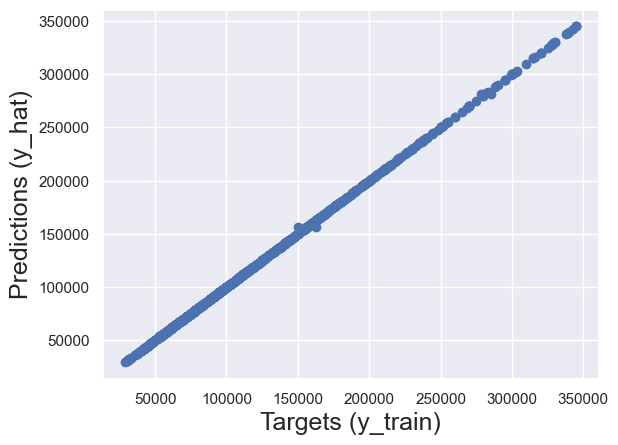

In [37]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# We want the x-axis and the y-axis to be the same
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13036\1992934893.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

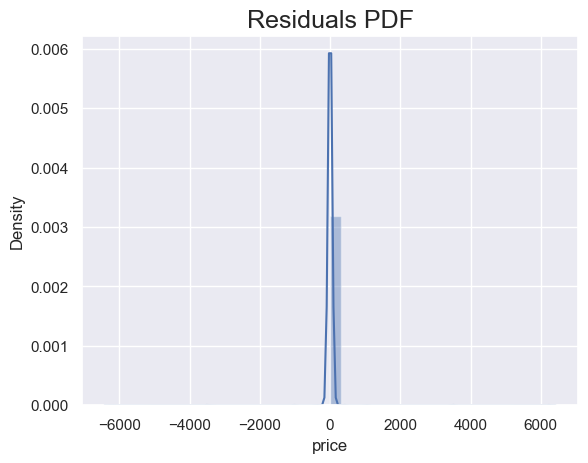

In [38]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed

# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model which is overfitted

In [39]:
# Find the R-squared of the model
model.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.9999814506910335

## Testing

In [41]:
y_hat_test = model.predict(x_test)

In [42]:
# I will use a grid search to find the best hyperparameters for a DecisionTreeRegressor 
# and then evaluate the model with the best hyperparameters on a testing set.
# Overfitting is a common concern when tuning hyperparameters, and it can manifest in several ways.

In [43]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = DecisionTreeRegressor(**best_params)
best_model.fit(x_train, y_train)
test_score = best_model.score(x_test, y_test)
print(f"Best Hyperparameters: {best_params}")
print(f"Testing Set R2 Score: {test_score}")

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Testing Set R2 Score: 0.583595817876601


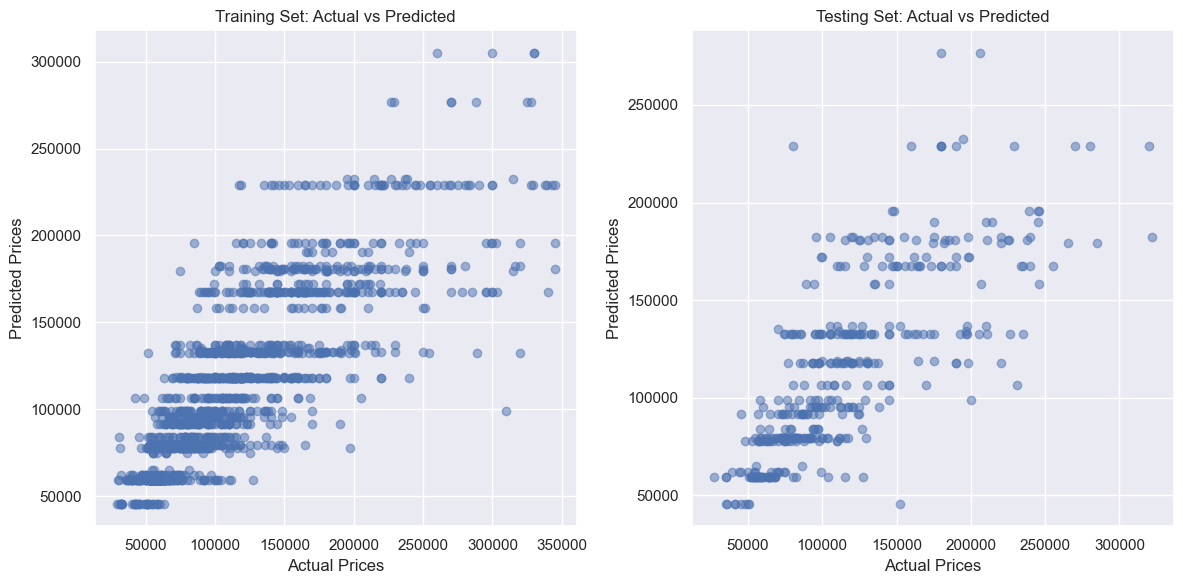

In [44]:
y_train_pred = best_model.predict(x_train)

# Predictions on the testing set
y_test_pred = best_model.predict(x_test)

# Scatter plot for the training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Scatter plot for the testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13036\326329448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred)


R2 Score on Training Set: 0.664666701434677
R2 Score on Testing Set: 0.583595817876601


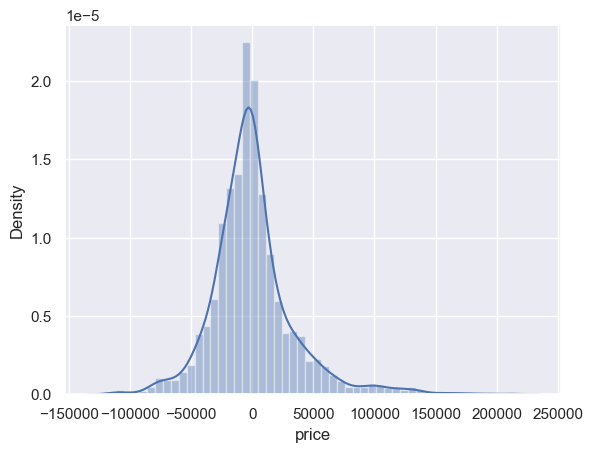

In [45]:
sns.distplot(y_train - y_train_pred)

r2_train = r2_score(y_train, y_train_pred)

# R2 score for the testing set
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 Score on Training Set: {r2_train}")
print(f"R2 Score on Testing Set: {r2_test}")